In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

Anotaciones:
Desde el lado de Estadistica querriamos ver que tan bueno se aproxima a una gaussiana. Desde ML que tan bien generaliza

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = pd.read_csv('data/alturas-pesos-mils-train.csv')[:-1]

In [4]:
test = pd.read_csv('data/alturas-pesos-mils-test.csv')

In [5]:
from BiVariateJoint import BiVariateJoint

In [6]:
data_hombres = data.loc[data['Genero']=='Hombre'][['Peso','Altura']].values
data_mujeres = data.loc[data['Genero']=='Mujer'][['Peso','Altura']].values

# Grafico los datos

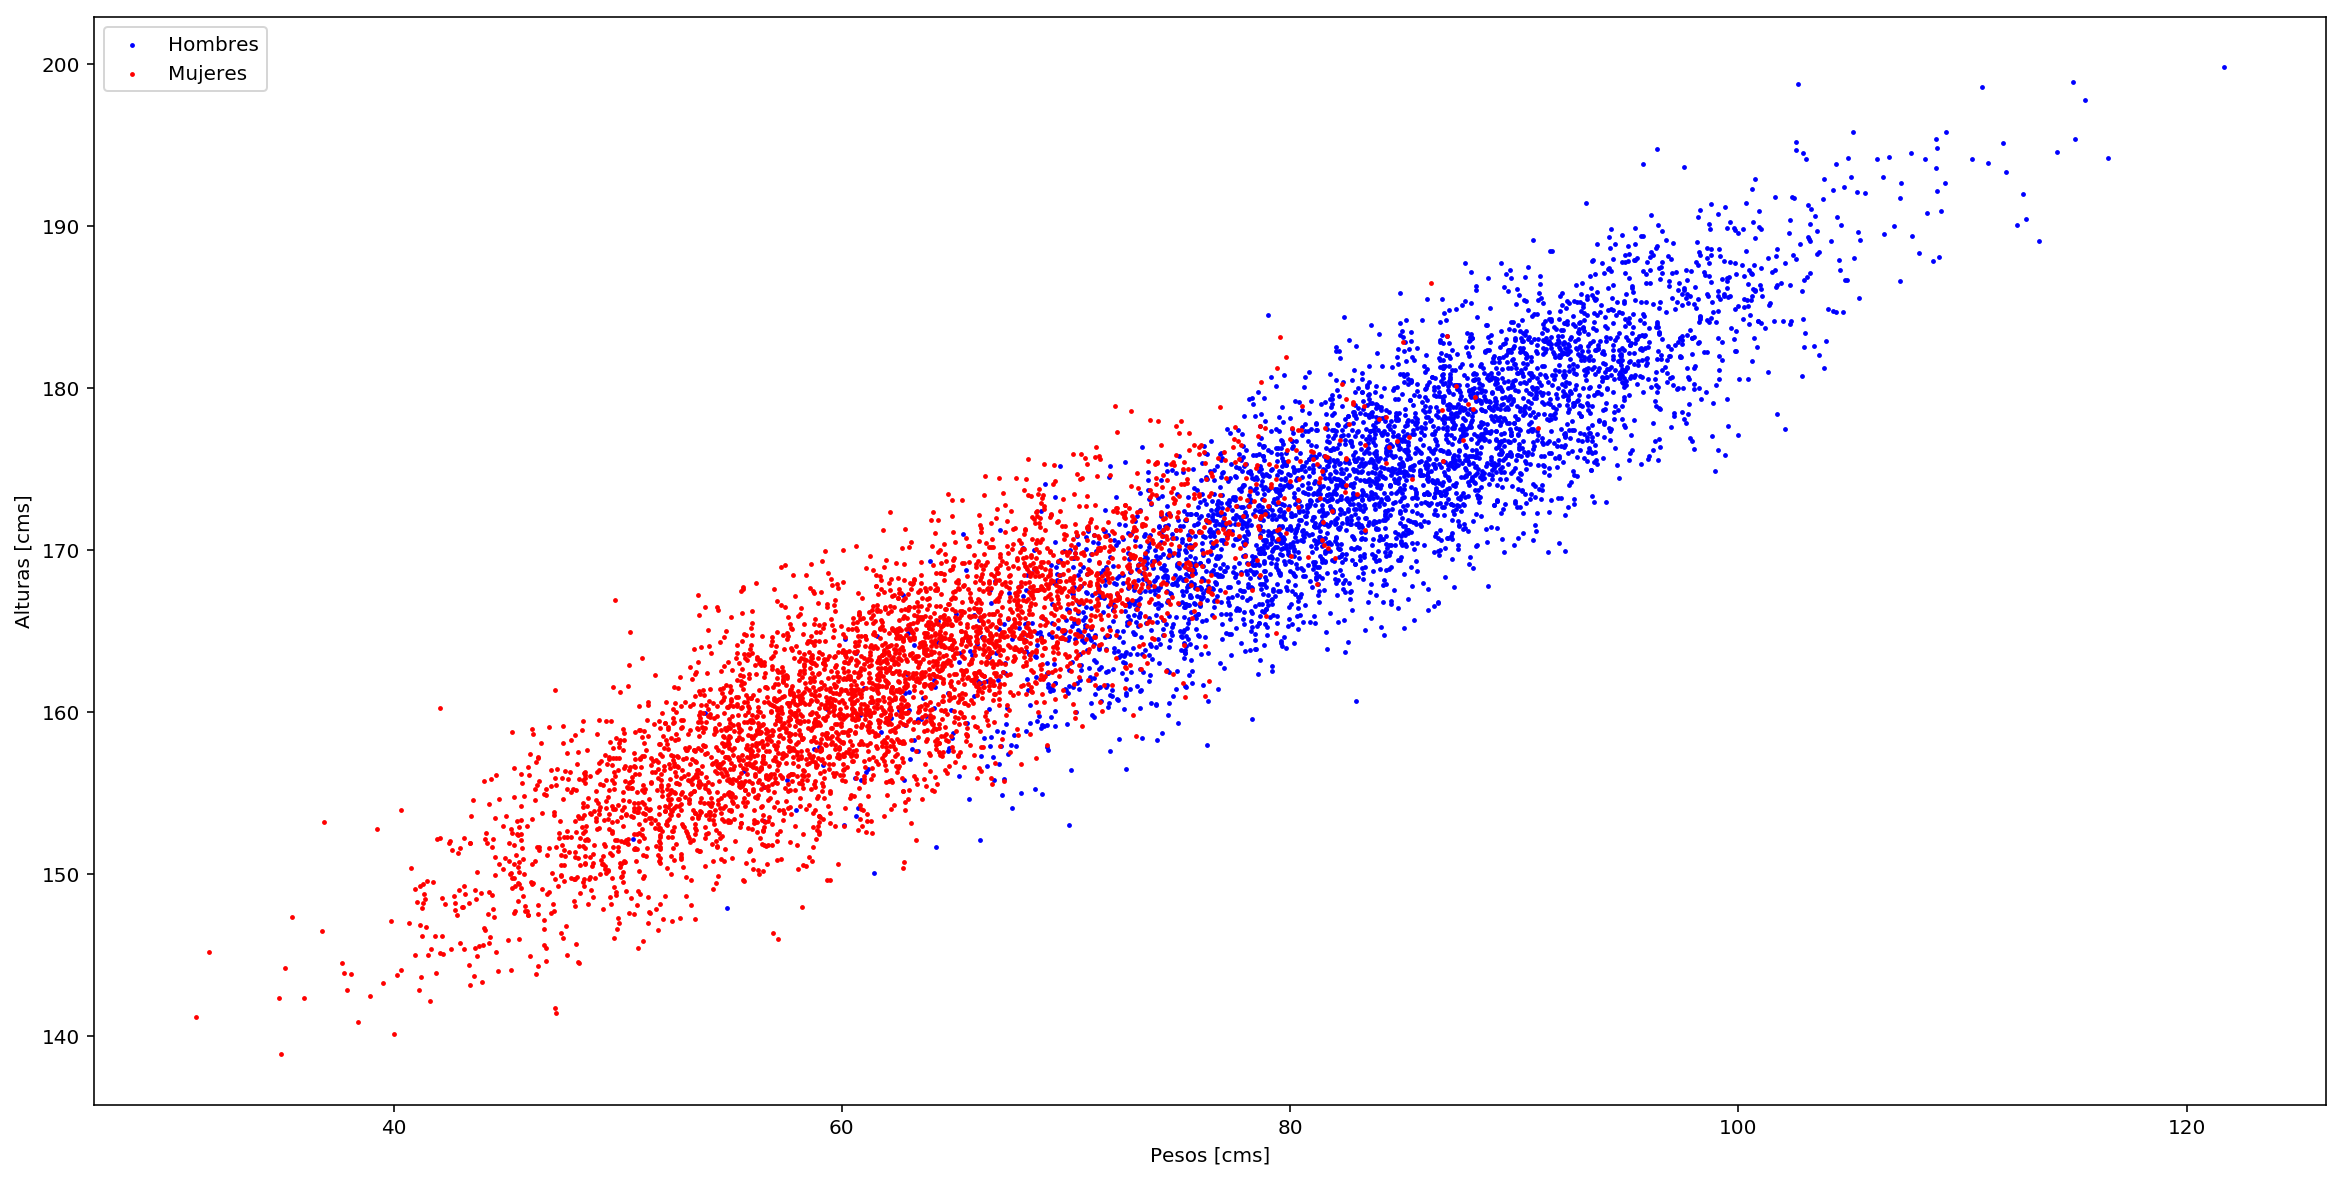

In [7]:
#%matplotlib qt
f = plt.figure(figsize=(20,10))
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, label='Hombres')
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, label='Mujeres')
plt.xlabel('Pesos [cms]')
plt.ylabel('Alturas [cms]')
plt.legend()
plt.show()

# LDA

\begin{equation}
\large
X^TW + C = 0
\end{equation}

\begin{equation}
\large
W = \Sigma^{-1}(\vec \mu_0- \vec \mu_1)
\end{equation}

\begin{equation}
\large
c =  log(\frac{P(C_0)}{P(C_1)}) - \frac{1}{2}(\vec{\mu}_0+\vec{\mu}_1)^T\Sigma^{-1}(\vec{\mu}_0-\vec{\mu}_1) = log(\frac{P(C_0)}{P(C_1)}) - \frac{1}{2}(\vec{\mu}_0+\vec{\mu}_1)^T W
\end{equation}

# Regresion Logistica

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
log_Reg = LogisticRegression()

In [10]:
log_Reg.fit(data[['Peso', 'Altura']].values, data['Genero'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
data[['Peso', 'Altura']][:10]

,Peso,Altura
0,61.235,162.402
1,97.432,181.908
2,73.324,172.459
3,55.193,157.748
4,56.886,151.798
5,59.834,158.623
6,77.618,172.705
7,68.889,169.225
8,53.874,155.487
9,83.248,177.908


In [12]:
acc_train_LR = log_Reg.score(data[['Peso', 'Altura']].values, data['Genero'])
print(acc_train_LR)

0.9166145768221028


In [13]:
acc_CV_LR = log_Reg.score(test[['Peso', 'Altura']].values, test['Genero'])
print(acc_CV_LR)

0.922


In [14]:
log_Reg.predict_proba(test[['Peso', 'Altura']].values)

array([[0.99666625, 0.00333375],
       [0.01264872, 0.98735128],
       [0.05577877, 0.94422123],
       ...,
       [0.00175388, 0.99824612],
       [0.96832605, 0.03167395],
       [0.0164604 , 0.9835396 ]])

In [15]:
N = 300
X = np.linspace(data.min()['Peso'], data.max()['Peso'], N)
Y = np.linspace(data.min()['Altura'], data.max()['Altura'], N)
X, Y = np.meshgrid(X, Y)

Z_lr = log_Reg.predict_proba(np.c_[X.ravel(), Y.ravel()])[:, 0]

# Put the result into a color plot
Z_lr = Z_lr.reshape(X.shape)

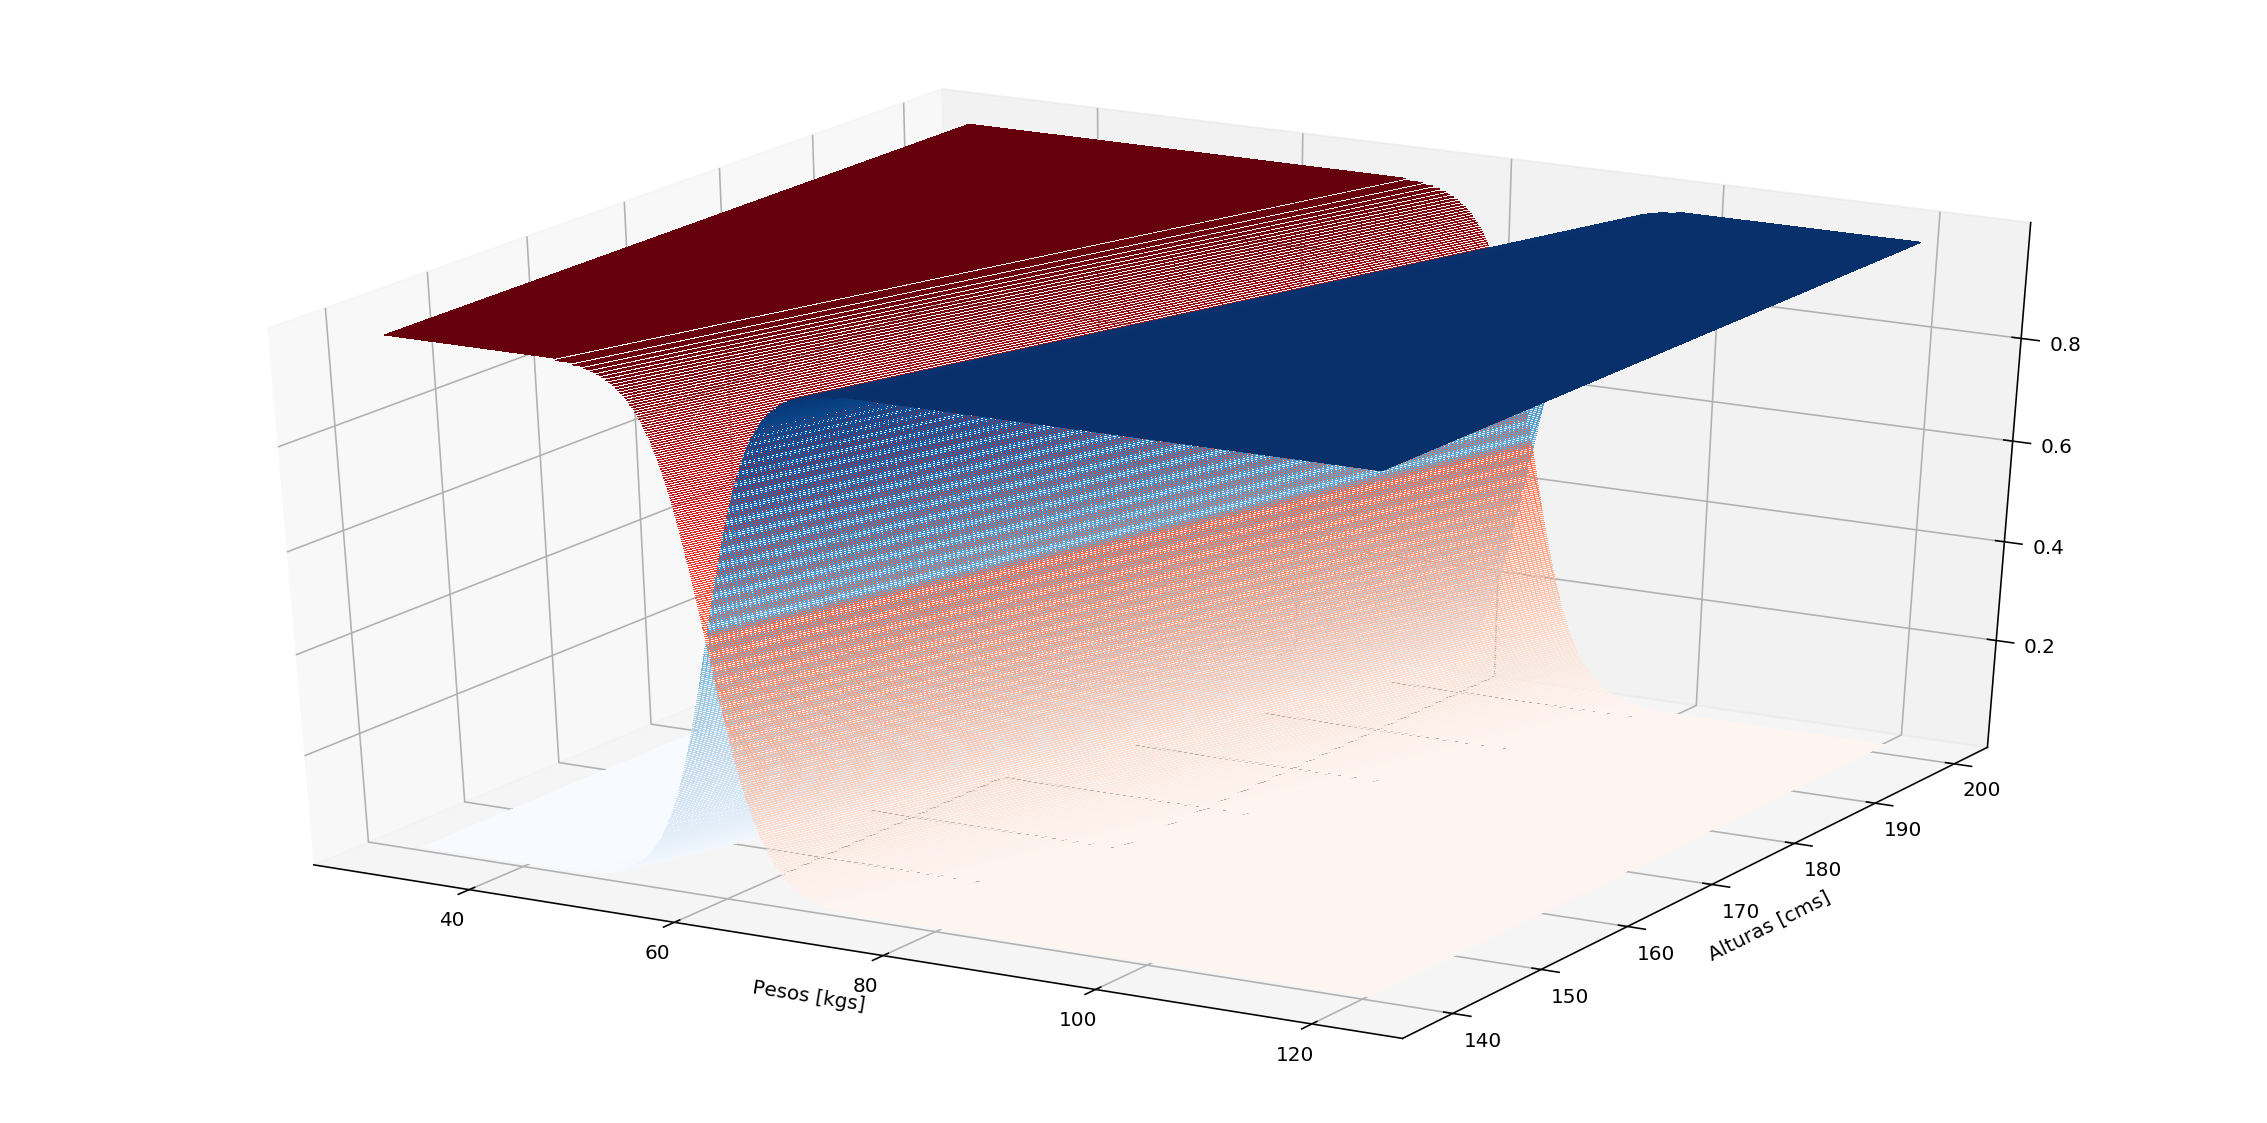

In [17]:
#%matplotlib qt
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
cm_blues = plt.cm.Blues
cm_greens = plt.cm.Reds
ax.contourf(X, Y, Z_lr, 256, vmin=0., vmax=1., cmap=cm_blues)
ax.contourf(X, Y, 1-Z_lr, 256, vmin=0., vmax=1., cmap=cm_greens)
# ax.set_title('TRAIN: ' + str(np.round(acc_train_LR*100)/100) + ' - CV:' + str(np.round(acc_CV_LR*100)/100))
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
#ax.view_init(70, -90)
plt.show()

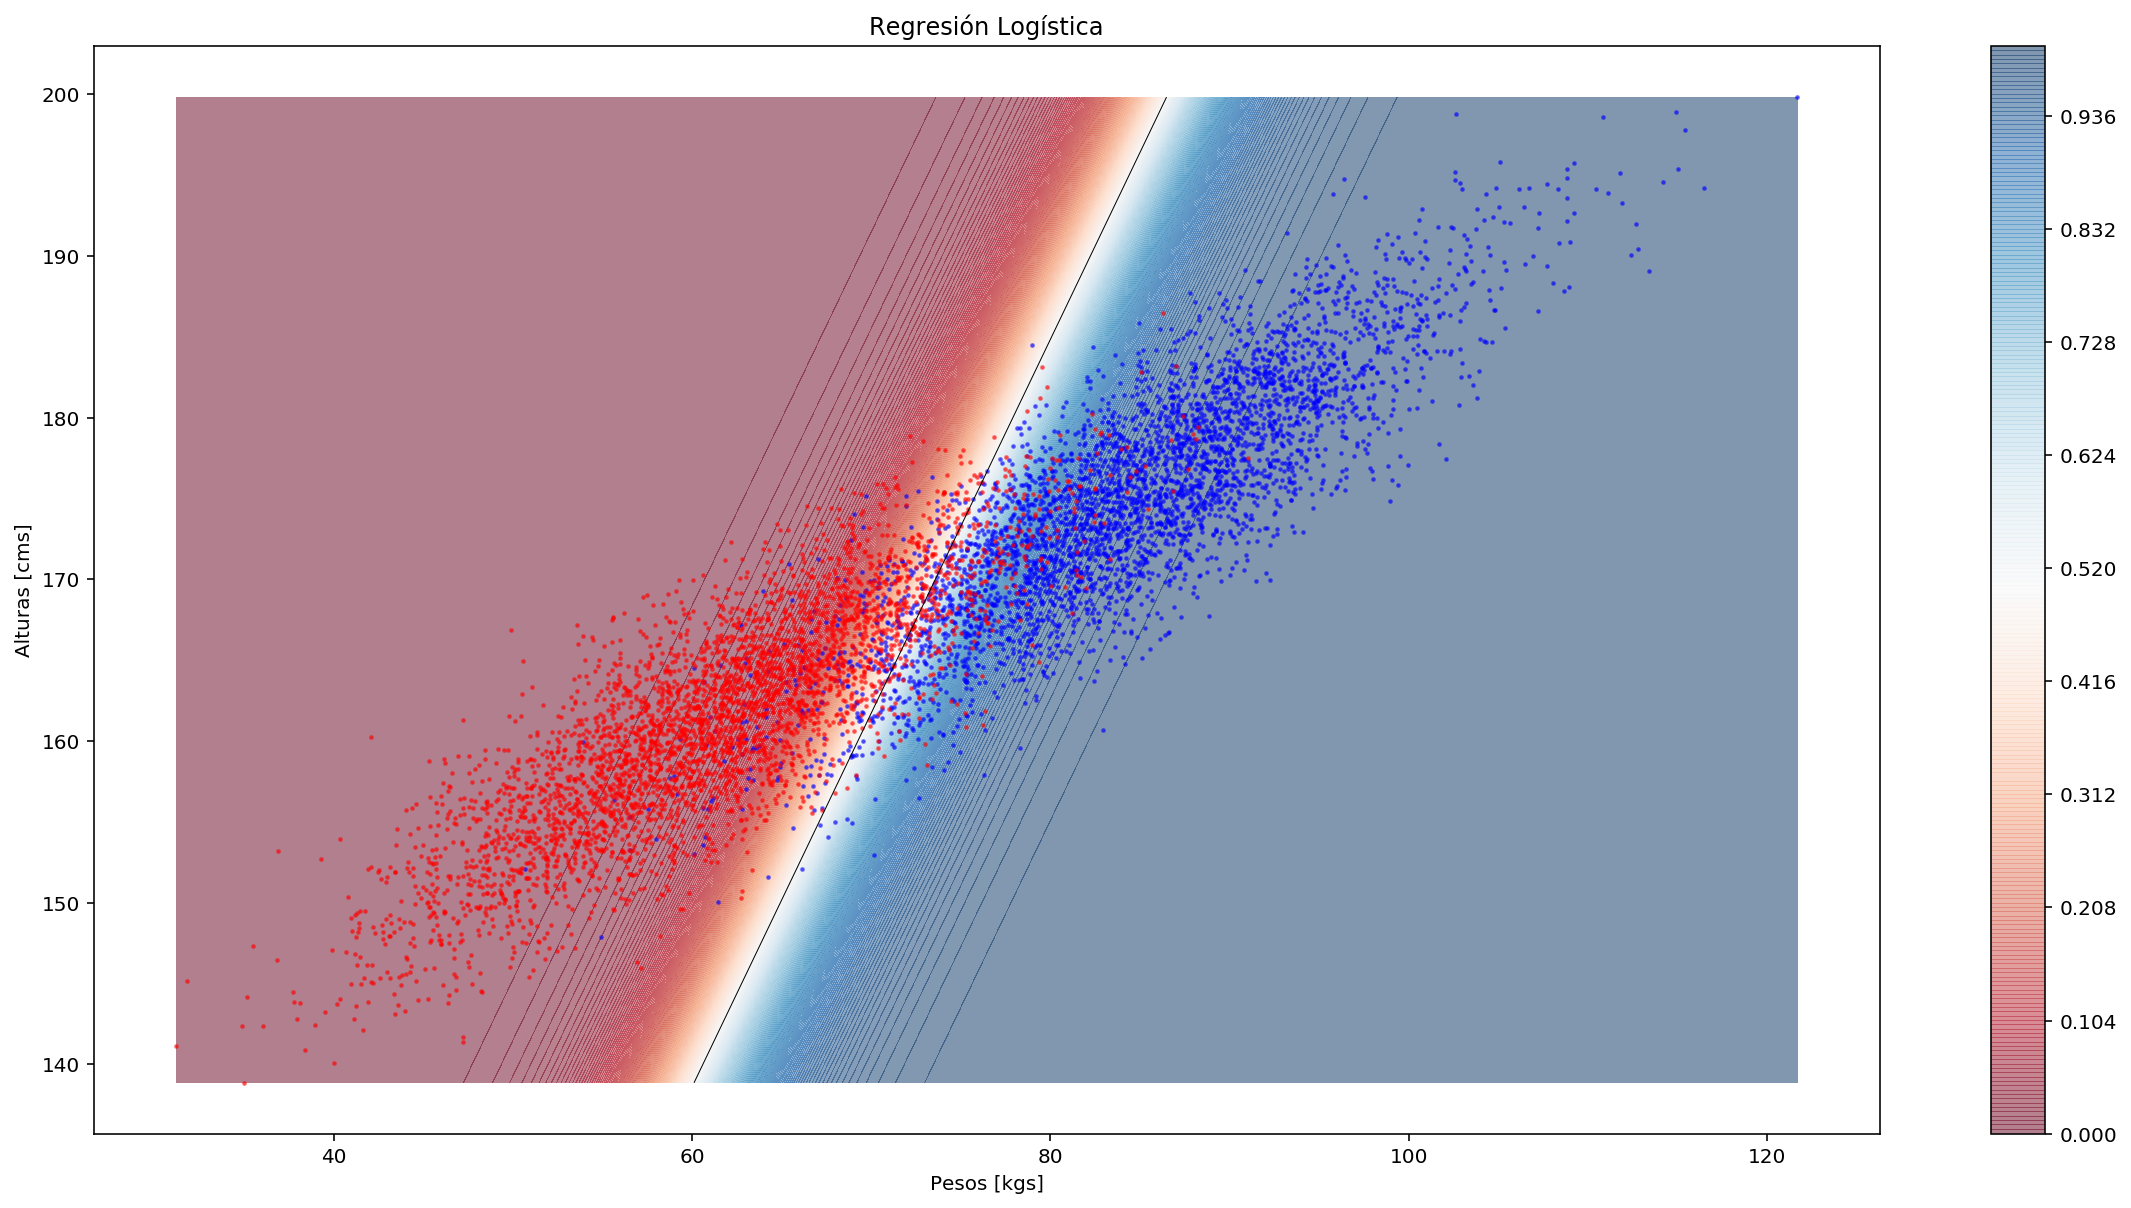

In [18]:
#%matplotlib qt
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_lr, 256, alpha=.5, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.contour(X, Y, Z_lr, (0.5,), colors='k', linewidths=0.5)
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, alpha=0.5)
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, alpha=0.5)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.title('Regresión Logística')
plt.show()

|Modelo| tipo| Train Acc| CV Acc|Comentarios
|-| -| -| -|-|
|Histogram - step 0.25|Bayes|0.97|0.68
|Histogram - step 0.25|Naive Bayes|0.89|0.88
|Histogram - step 0.5|Bayes|0.94|0.82
|Histogram - step 0.5|Naive Bayes|0.89|0.88
|Histogram - step 1|Bayes|0.92|0.90
|Histogram - step 1|Naive Bayes|0.89|0.88
|Histogram - step 4|Bayes|0.91|0.92| No generaliza por afuera de la zona de los puntos
|Histogram - step 4|Naive Bayes|0.89|0.88
|Histogram - step 8|Bayes|0.90|0.90
|Histogram - step 8|Naive Bayes|0.87|0.86
|Gaussian|Bayes|0.92|0.92|
|Gaussian|Naive Bayes|0.89|0.89|
|Regresion Logística|-|0.92|0.92|